# Fingerprint bit coverage and variability

We check the coverage and variability of fingerprint bit positions across all fingerprints in our dataset.

- Investigate missing bits across fingerprints
- Investigate bit variability across fingerprints (standard deviation)
- Get top X bit positions with no/high standard deviation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from kissim.encoding import FingerprintGenerator

from src.paths import PATH_RESULTS

In [3]:
plt.style.use("seaborn")

In [4]:
HERE = Path(_dh[-1])  # noqa: F821
RESULTS = PATH_RESULTS / "all"

## Load fingerprints

Let's load our pre-calculated fingerprint saved in a _json_ file as `FingerprintGenerator` object.

In [5]:
fingerprint_generator = FingerprintGenerator.from_json(RESULTS / "fingerprints_clean.json")
fingerprint_generator_normalized = FingerprintGenerator.from_json(
    RESULTS / "fingerprints_normalized.json"
)
if len(fingerprint_generator.data) == len(fingerprint_generator_normalized.data):
    n_fingerprints = len(fingerprint_generator_normalized.data)
else:
    raise ValueError("Number of unnormalized/normalized fingerprints not the same.")
print(f"Number of fingerprints: {n_fingerprints}")

Number of fingerprints: 4681


## Missing bits across fingerprints

In [6]:
def nan_bit_ratio(fingerprint_generator, feature_group):

    if feature_group == "physicochemical":
        features = fingerprint_generator.physicochemical_exploded
    elif feature_group == "distances":
        features = fingerprint_generator.distances_exploded
    elif feature_group == "moments":
        features = fingerprint_generator.moments_exploded
    else:
        raise KeyError("Feature group unknown.")

    features = features.unstack()
    features_nan = features.isnull().sum(axis=0) / len(features)
    features_nan = features_nan.unstack(0)

    return features_nan

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

### Missing physicochemical bits

In [7]:
feature_group = "physicochemical"
features_nan = nan_bit_ratio(fingerprint_generator_normalized, feature_group)
features_nan

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
residue_ix,,,,,,,,
1,0.001495,0.001495,0.001495,0.001495,0.001495,0.001495,0.065157,0.001495
2,0.000855,0.000855,0.000855,0.000855,0.000855,0.000855,0.027985,0.000855
3,0.001495,0.001495,0.001495,0.001495,0.001495,0.001495,0.006836,0.001709
4,0.007904,0.007904,0.007904,0.007904,0.007904,0.007904,0.950224,0.008118
5,0.029908,0.029908,0.029908,0.029908,0.029908,0.029908,0.128178,0.030122
...,...,...,...,...,...,...,...,...
81,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007477,0.000427
82,0.004059,0.004059,0.004059,0.004059,0.004059,0.004059,0.007050,0.004059
83,0.021363,0.021363,0.021363,0.021363,0.021363,0.021363,0.984191,0.021577


In [8]:
features_nan.describe()

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.012443,0.012443,0.012443,0.012443,0.012443,0.012443,0.094859,0.012566
std,0.040163,0.040163,0.040163,0.040163,0.040163,0.040163,0.213194,0.040266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003418,0.000000
50%,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641,0.018586,0.000641
75%,0.004486,0.004486,0.004486,0.004486,0.004486,0.004486,0.060244,0.004486
max,0.332408,0.332408,0.332408,0.332408,0.332408,0.332408,0.984191,0.332621


#### Heatmap (for an overview)

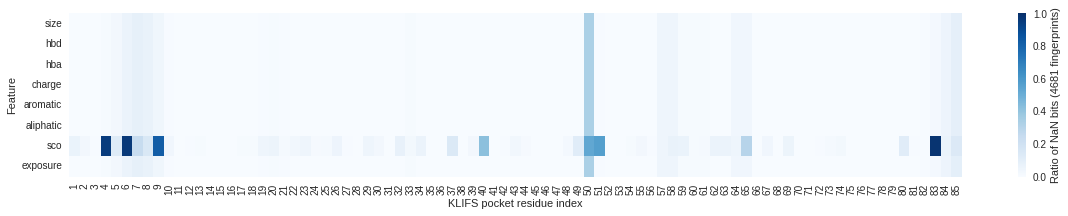

In [9]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_nan.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Ratio of NaN bits ({n_fingerprints} fingerprints)"},
    vmin=0,
    vmax=1,
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

#### Barplot (for concrete values)

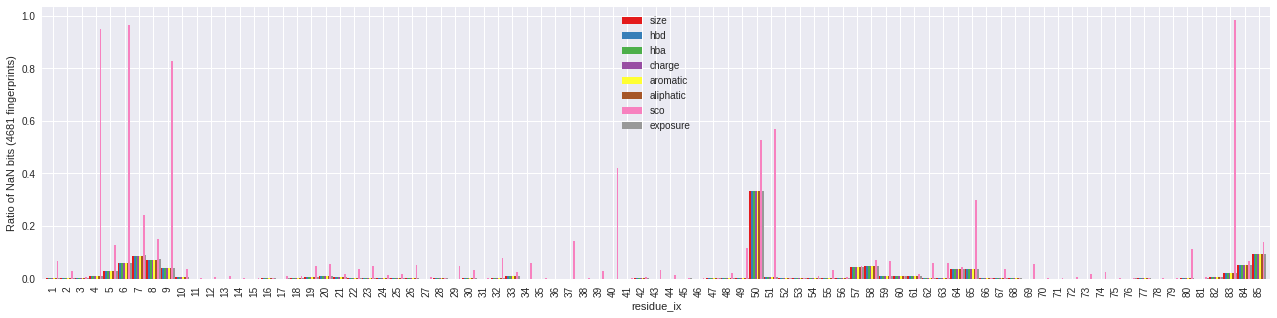

In [10]:
ax = features_nan.plot(kind="bar", figsize=(22, 5), width=1, colormap="Set1")
ax.set_ylabel(f"Ratio of NaN bits ({n_fingerprints} fingerprints)");

__Observations__

- _Side chain orientation_: Gly-rich positions (e.g. 4, 6, 9, 83) have high ratios of missing side orientation values because Gly has no side chain.
- _All feature types_: Higher ratios of missing bits for pocket positions with high ratio of missing residues (e.g. 50, 4-9, 83-58). Check out pattern resemblance with plot on "Missing residues in the kinase binding site" in [this notebook](https://github.com/volkamerlab/kissim_app/blob/master/notebooks/dataset/explore_dataset.ipynb).

### Missing distance bits

In [11]:
feature_group = "distances"
features_nan = nan_bit_ratio(fingerprint_generator_normalized, feature_group)
features_nan

,hinge_region,dfg_region,front_pocket,center
residue_ix,,,,
1,0.001495,0.007904,0.001495,0.001495
2,0.000855,0.007263,0.000855,0.000855
3,0.001495,0.007904,0.001495,0.001495
4,0.008118,0.014527,0.008118,0.008118
5,0.030122,0.036103,0.030122,0.030122
...,...,...,...,...
81,0.000000,0.006409,0.000000,0.000000
82,0.004059,0.010468,0.004059,0.004059
83,0.021577,0.027985,0.021577,0.021577


In [12]:
features_nan.describe()

,hinge_region,dfg_region,front_pocket,center
count,85.000000,85.000000,85.000000,85.000000
mean,0.012451,0.018628,0.012451,0.012451
std,0.040183,0.040052,0.040183,0.040183
min,0.000000,0.006409,0.000000,0.000000
25%,0.000000,0.006409,0.000000,0.000000
50%,0.000641,0.006623,0.000641,0.000641
75%,0.004273,0.010468,0.004273,0.004273
max,0.332408,0.338603,0.332408,0.332408


#### Heatmap (for an overview)

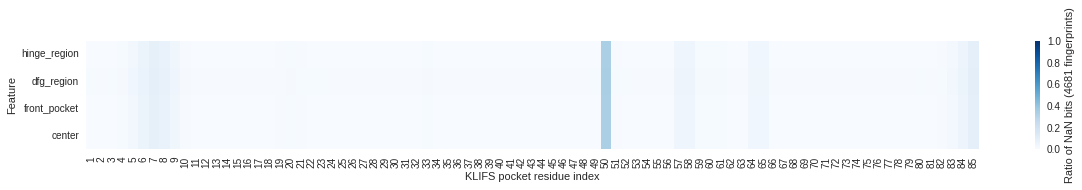

In [13]:
plt.figure(figsize=(20, 2))
sns.heatmap(
    features_nan.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Ratio of NaN bits ({n_fingerprints} fingerprints)"},
    vmin=0,
    vmax=1,
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

#### Barplot (for concrete values)

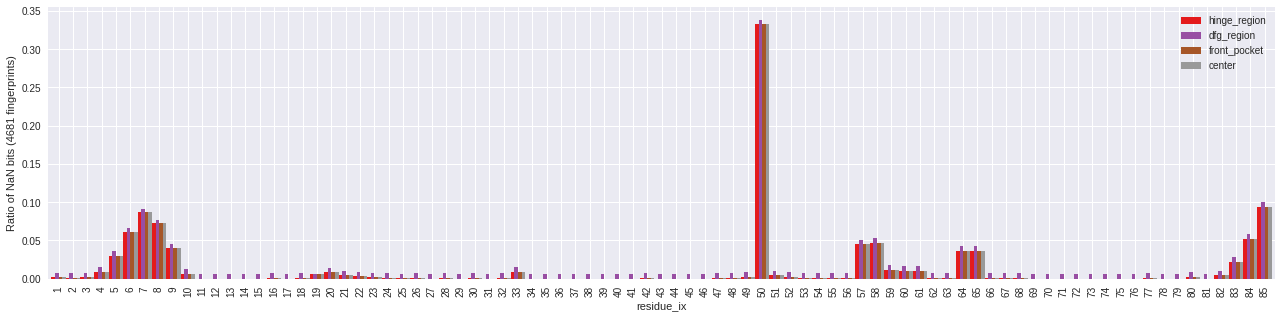

In [14]:
ax = features_nan.plot(kind="bar", figsize=(22, 5), width=1, colormap="Set1")
ax.set_ylabel(f"Ratio of NaN bits ({n_fingerprints} fingerprints)");

__Observations__

- As before for the physicochemical bits, the pattern here resembles the missing residue pattern.

### Missing moments bits

In [15]:
feature_group = "moments"
features_nan = nan_bit_ratio(fingerprint_generator_normalized, feature_group)
features_nan

,hinge_region,dfg_region,front_pocket,center
moment,,,,
1,0.0,0.006409,0.0,0.0
2,0.0,0.006409,0.0,0.0
3,0.0,0.006409,0.0,0.0


In [16]:
features = fingerprint_generator_normalized.moments_exploded
structures_nan = features[features.isna().any(axis=1)]
print(
    f"Number of structures with at least one NaN moment: "
    f"{len(structures_nan.index.get_level_values(0).unique())}"
)
structures_nan

Number of structures with at least one NaN moment: 30


hinge_region  dfg_region  front_pocket    center
structure_klifs_id moment                                                  
777                1           0.347416         NaN      0.345910  0.315488
                   2           0.253000         NaN      0.261731  0.328164
                   3           0.682762         NaN      0.658015  0.594009
793                1           0.334812         NaN      0.307664  0.315704
                   2           0.163970         NaN      0.240854  0.270043
...                                 ...         ...           ...       ...
12171              2           0.205245         NaN      0.233267  0.314840
                   3           0.652081         NaN      0.653932  0.609539
12918              1           0.295937         NaN      0.290369  0.232519
                   2           0.232299         NaN      0.259145  0.310558
                   3           0.682108         NaN      0.638078  0.589015

[90 rows x 4 columns]

__Observations__

- About 70 structures show at least one empty moment, matching well with the number of structures for which one or more subpocket centers could not be determined and thus, no distance distribution and no corresponding moments could be inferred. Check out "Number of structures that will have no subpocket centers" in [this notebook](https://github.com/volkamerlab/kissim_app/blob/master/notebooks/dataset/explore_dataset.ipynb).

## Bit variability across fingerprints

In [17]:
def bit_variability(fingerprint_generator, feature_group):

    if feature_group == "physicochemical":
        features = fingerprint_generator.physicochemical_exploded
    elif feature_group == "distances":
        features = fingerprint_generator.distances_exploded
    elif feature_group == "moments":
        features = fingerprint_generator.moments_exploded
    else:
        raise KeyError("Feature group unknown.")

    features = features.unstack()
    features_std = features.std()
    features_std = features_std.unstack(0)

    return features_std

### Physicochemical bit variability

In [18]:
features_std = bit_variability(fingerprint_generator_normalized, "physicochemical")
features_std

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
residue_ix,,,,,,,,
1,0.310772,0.329461,0.422503,0.397869,0.138183,0.324023,0.249295,0.254177
2,0.299063,0.222971,0.354505,0.312996,0.197439,0.499464,0.223846,0.143625
3,0.158134,0.019471,0.020670,0.014622,0.054653,0.068452,0.232352,0.117997
4,0.115546,0.056378,0.063643,0.031131,0.058602,0.186211,0.298159,0.450024
5,0.321770,0.299024,0.405614,0.372018,0.134759,0.335532,0.101706,0.191553
...,...,...,...,...,...,...,...,...
81,0.040606,0.013770,0.092014,0.049327,0.025310,0.048424,0.207559,0.260216
82,0.134138,0.079340,0.064218,0.012681,0.231155,0.225300,0.161926,0.239187
83,0.044208,0.037042,0.079472,0.034598,0.014775,0.098635,0.230094,0.362168


In [19]:
features_std.describe()

,size,hbd,hba,charge,aromatic,aliphatic,sco,exposure
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.240743,0.162522,0.203897,0.138420,0.205320,0.301111,0.182394,0.260300
std,0.097114,0.102497,0.131241,0.126738,0.143615,0.144020,0.099371,0.082273
min,0.007311,0.000000,0.000000,0.000000,0.000000,0.025321,0.000000,0.024212
25%,0.178283,0.081304,0.096927,0.020657,0.097866,0.202260,0.106093,0.220221
50%,0.253917,0.160463,0.211483,0.091402,0.186054,0.324023,0.206455,0.258474
75%,0.310772,0.222971,0.301591,0.255636,0.322697,0.430908,0.253986,0.310702
max,0.409275,0.418905,0.462471,0.408009,0.499848,0.500016,0.388037,0.450024


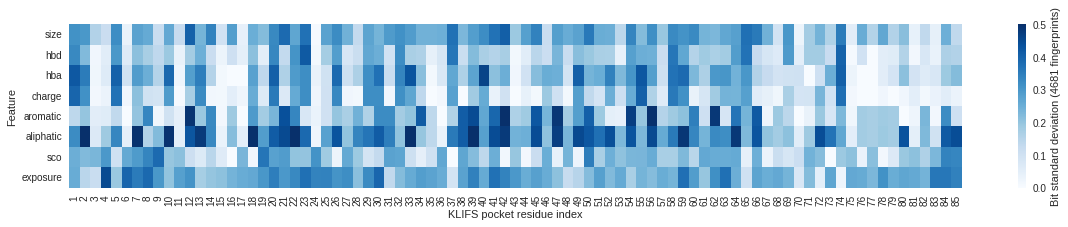

In [20]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

__Observations__

- Highest variability for HBD, lowest for aromatic and aliphatic
- Conserved regions show as expected rigid size/pharmacophoric feature variability (e.g. 4, 6, 17, 24, 70, 75, 81-83).

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

### Distances bit variability

In [21]:
features_std = bit_variability(fingerprint_generator_normalized, "distances")
features_std

,hinge_region,dfg_region,front_pocket,center
residue_ix,,,,
1,0.044047,0.064269,0.057546,0.052467
2,0.050015,0.081816,0.068257,0.068752
3,0.079110,0.089459,0.091016,0.096626
4,0.070290,0.083783,0.075166,0.082236
5,0.061540,0.125608,0.068928,0.079116
...,...,...,...,...
81,0.103630,0.095331,0.082335,0.108082
82,0.119726,0.131192,0.141856,0.096356
83,0.068920,0.093408,0.096517,0.047484


In [22]:
features_std.describe()

,hinge_region,dfg_region,front_pocket,center
count,85.000000,85.000000,85.000000,85.000000
mean,0.098545,0.095311,0.103384,0.102986
std,0.023834,0.022329,0.021059,0.025941
min,0.044047,0.049225,0.057546,0.047411
25%,0.080856,0.081208,0.088027,0.086428
50%,0.100729,0.094404,0.104822,0.104511
75%,0.112770,0.110042,0.116069,0.121790
max,0.164849,0.157360,0.151724,0.166614


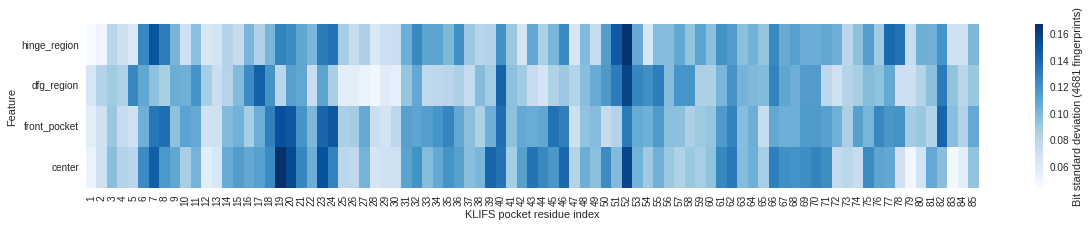

In [23]:
plt.figure(figsize=(20, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

__Observations__

- Higher variability for 
  - residues 6-8 (part of the G-loop, known for loop flexibility) 
  - residues 20-24 (part of aC-helix, known for conformational changes)
  - residues 82-85 (part of DFG-loop and activation loop, know for conformational changes) 
  - residues 59-61 (part of aE-helix, ???)
  - residue 33 w.r.t. hinge region (???)

![KLIFS kinase sequence logo](https://klifs.net/images/faq/colors.png)

![](https://klifs.net/images/faq/pocket.png)

### Moments bit variability

In [24]:
features_std = bit_variability(fingerprint_generator_normalized, "moments")
features_std

,hinge_region,dfg_region,front_pocket,center
moment,,,,
1,0.109868,0.079061,0.110585,0.128399
2,0.094276,0.092655,0.104055,0.095322
3,0.067043,0.074117,0.070513,0.170422


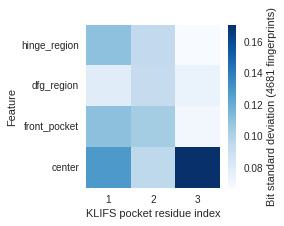

In [25]:
plt.figure(figsize=(3, 3))
sns.heatmap(
    features_std.transpose(),
    cmap="Blues",
    cbar_kws={"label": f"Bit standard deviation ({n_fingerprints} fingerprints)"},
)
plt.xlabel("KLIFS pocket residue index")
plt.ylabel("Feature");

## Top X bit with no/low/high variability

Get per-bit standard deviation for all feature types and check for bits with no/low/high variability.

In [26]:
bits_std = []
for feature_group in ["physicochemical", "distances", "moments"]:
    bits_std.append(bit_variability(fingerprint_generator_normalized, feature_group).unstack())
bits_std = pd.concat(bits_std)
bits_std.index.names = ["feature", "residue_ix"]
print(f"Number of bits with std: {len(bits_std)}")

Number of bits with std: 1032


### No variability

In [27]:
bits_std_no_variability = bits_std[bits_std == 0]
bits_std_no_variability.sort_index(level=1)

feature   residue_ix
aromatic  6             0.0
hba       16            0.0
sco       16            0.0
aromatic  17            0.0
hba       17            0.0
charge    35            0.0
aromatic  36            0.0
sco       37            0.0
charge    38            0.0
          43            0.0
aromatic  70            0.0
hba       71            0.0
sco       73            0.0
charge    76            0.0
hba       76            0.0
charge    77            0.0
hba       77            0.0
hbd       77            0.0
charge    79            0.0
aromatic  80            0.0
dtype: float64

In [28]:
print(
    f"Number of bits with no effect because they are always "
    f"(or almost always) the same: {len(bits_std_no_variability)}"
)

Number of bits with no effect because they are always (or almost always) the same: 20


### Low variability

In [29]:
bits_std_low_variability = bits_std[bits_std != 0].sort_values().head(30)
bits_std_low_variability.sort_index(level=1)

feature   residue_ix
charge    3             0.014622
hbd       3             0.019471
charge    6             0.018468
          11            0.007308
          14            0.016334
aromatic  15            0.014616
charge    15            0.012655
hba       15            0.012655
sco       18            0.017980
hbd       24            0.011933
size      24            0.007311
charge    27            0.017891
          28            0.012657
          31            0.017891
hba       35            0.012655
charge    36            0.014611
sco       42            0.016396
hba       43            0.019323
hbd       43            0.012882
sco       44            0.014712
charge    45            0.012655
          48            0.012657
          75            0.014611
hbd       75            0.008437
charge    78            0.019323
sco       78            0.014615
charge    80            0.017924
hbd       81            0.013770
charge    82            0.012681
aromatic  83          

### High variability

In [30]:
bits_std_high_variability = bits_std[bits_std != 0].sort_values().tail(30)
bits_std_high_variability.sort_index(level=1)

feature    residue_ix
aliphatic  2             0.499464
exposure   4             0.450024
aliphatic  7             0.494349
           10            0.492834
aromatic   12            0.492033
aliphatic  13            0.480104
           18            0.499658
           21            0.449772
aromatic   21            0.437517
aliphatic  22            0.499987
           33            0.498241
           39            0.500016
aromatic   39            0.448976
hba        40            0.462471
aliphatic  41            0.445449
           42            0.479814
aromatic   42            0.499848
aliphatic  45            0.446855
           47            0.470872
aromatic   47            0.485392
aliphatic  49            0.452121
           52            0.439677
aromatic   54            0.472081
aliphatic  56            0.451133
aromatic   56            0.496115
aliphatic  59            0.484953
aromatic   62            0.483434
aliphatic  64            0.484212
           72            0